# Allan deviation of ROMY components

### Import libraries

In [1]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import allantools as al

from matplotlib.pylab import *
from matplotlib import rc, font_manager
from obspy import *

### Import data

In [2]:
path = '/home/andbro/Desktop/GJI/Figure08/data/'

stROMY = read(f"{path}data/romyADEV_BJ.mseed")
stROMYZ = read(f"{path}data/romyADEV_BJZ.mseed")

FileNotFoundError: [Errno 2] No such file or directory: '/home/andbro/Desktop/GJI/Figure08/data/data/romyADEV_BJ.mseed'

Resample to 1 Hz and define tau axis

In [3]:

stROMYZ.resample(1.0)
stROMY.resample(1.0)


tau1 = 0
tau2 = 4
taus = np.logspace(tau1, tau2, 1000)

NameError: name 'stROMYZ' is not defined

### Calculation of Allan deviation

In [4]:
(tZ, adZ, ade, adn) = al.adev(stROMYZ[0].data, 
                              rate=stROMYZ[0].stats.sampling_rate, 
                              data_type="freq", 
                              taus=taus
                             )
(tU, adU, ade, adn) = al.adev(stROMY.select(channel='BJU')[0].data, 
                              rate=stROMY[0].stats.sampling_rate, 
                              data_type="freq", 
                              taus=taus
                             )
(tV, adV, ade, adn) = al.adev(stROMY.select(channel='BJV')[0].data, 
                              rate=stROMY[0].stats.sampling_rate, 
                              data_type="freq", 
                              taus=taus
                             )
(tW, adW, ade, adn) = al.adev(stROMY.select(channel='BJW')[0].data, 
                              rate=stROMY[0].stats.sampling_rate, 
                              data_type="freq", 
                              taus=taus
                             )

NameError: name 'stROMYZ' is not defined

### Plotting

In [5]:
sizeOfFont = 16

fontProperties = {'weight' : 'bold', 'size' : sizeOfFont}

rc('font',**fontProperties)

## colors
c_a = (0,0,1)
c_z = (0,0,0)
c_v = (0,0,0)
c_w = (0,0,0)
c_u = (0,0,0)

NameError: name 'tZ' is not defined

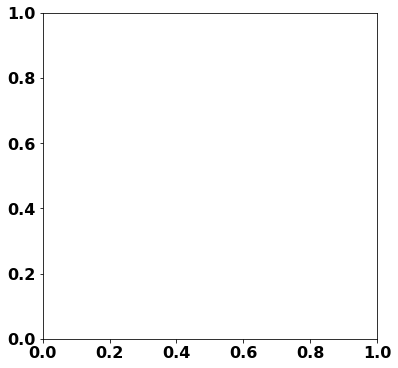

In [6]:

fig = plt.figure(figsize=(6, 6))
ax00 = plt.subplot2grid((1, 1), (0, 0))

line_z, = ax00.loglog(tZ, adZ, color=c_z, linewidth=2, linestyle='-')
line_v, = ax00.loglog(tV, adV, color=c_v, linewidth=2, linestyle='--')
line_w, = ax00.loglog(tW, adW, color=c_w, linewidth=2, linestyle=':')
line_u, = ax00.loglog(tU, adU, color=c_u, linewidth=2, linestyle='-.')

ax00.set_ylim(1e-12, 1.5e-10)    
ax00.set_xlim(1, 2e3)    

ax00.grid(which='major', color='k', alpha=0.4, linestyle='-')
ax00.grid(which='minor', color='k', alpha=0.2, linestyle='--')
ax00.tick_params(axis='x', which='major', direction='in', top=True)
ax00.tick_params(axis='x', which='minor', direction='in', top=True)
ax00.tick_params(axis='y', which='major', direction='in', right=True)
ax00.tick_params(axis='y', which='minor', direction='in', right=True)

ax00.set_xlabel(r'$\tau$ [s]')
ax00.set_ylabel(r'$\sigma(\tau)$ [rad/s]')

# legend
lines = [line_z, line_v, line_w, line_u]
labels = ['Z',  'V', 'W', 'U']
    
plt.legend(lines, labels,
            loc=(0.1, 0.1),
            bbox_transform=None,
            frameon=True,
            ncol = 1,
          )



plt.subplots_adjust(
                    top=0.98,
                    bottom=0.1,
                    left=0.15,
                    right=0.98,
                    hspace=0.05,
                    wspace=0.05,
)

plt.savefig(f'{path}adev_ROMY_single.png')

plt.show()
